<a href="https://colab.research.google.com/github/GstavRocha/DataAlanlise/blob/main/Atividade_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de Analise de Dados
## Docente Gustavo Fontoura
### Discente Luiz Gustavo da Rocha Ferreira
Esta é uma atividade mais complexa, mas ainda podemos avaliar os dados.
a) Baixe os arquivos em anexos que contêm os dados e o dicionário dos dados;
b) abra o arquivo do ENEM no Colab;
c) manipule as variáveis para obter as seguintes informações:
1. Quantos candidatos fazem parte da base de dados;
2. Qual é a proporção de sexo entre os candidatos;
3. Elabore um histograma da idade;
4. Calcule a média das notas das provas do ENEM;
5. Faça um boxplot das notas de CN do ENEM;
6. Faça o boxplot das notas de CN distribuídas por Sexo;
7. Calcule a média da nota da redação por Dependência Administrativa;

In [1]:
from IPython.display import display, Math, HTML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('ENEM2019_RN.csv', encoding='utf8')
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,133664,190001138292,2019,2305357,Icapuí,23,CE,19,F,1,...,B,A,A,B,A,A,C,A,B,B
1,135588,190001140216,2019,2306009,Iracema,23,CE,18,F,1,...,B,A,B,D,B,A,E,B,D,B
2,142489,190001147117,2019,2305357,Icapuí,23,CE,18,F,0,...,A,A,A,A,A,A,B,A,B,B
3,163886,190001168518,2019,2305357,Icapuí,23,CE,17,F,1,...,B,A,A,B,A,A,C,A,B,B
4,271794,190001276426,2019,2933000,Valente,29,BA,18,M,0,...,A,A,A,B,A,A,C,A,A,B


1. Quantos candidatos fazem parte da base de dados;

In [2]:
# O pandas ignora o cabeçalho por padrão.
total_candidatos = len(df)
total_candidatos

20349

2. Qual é a proporção de sexo entre os candidatos;
considerando que:

In [3]:
display("Propoções Entre Homems e Mulheres")
display(Math(r"P=\frac{n_1}{n_2}"))

'Propoções Entre Homems e Mulheres'

<IPython.core.display.Math object>

In [4]:
df_sexo = pd.DataFrame({
    'SEXO': df.TP_SEXO
})
contagem_sexo = df_sexo.value_counts()
propocao_sexo = contagem_sexo/len(df_sexo) * 100
propocao_sexo



SEXO
F       57.270628
M       42.729372
Name: count, dtype: float64

3. Elabore um histograma da idade;

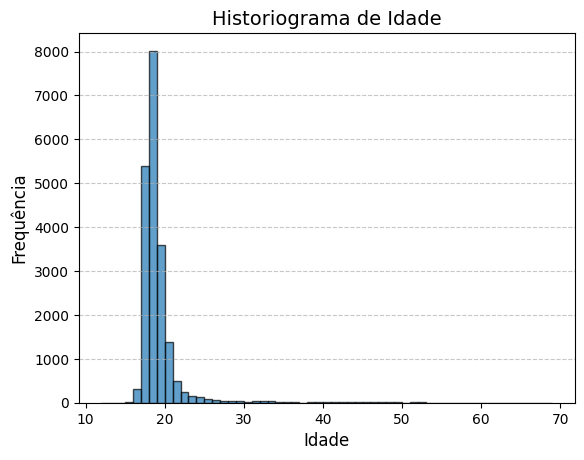

In [5]:
df_idade = pd.DataFrame({
    "IDADE": df.NU_IDADE
})
historigrama_idade = df_idade
plt.title("Historiograma de Idade", fontsize=14)
plt.hist(historigrama_idade,bins=range(df['NU_IDADE'].min(),df['NU_IDADE'].max()+2), edgecolor='black', alpha=0.7)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()

4. Calcule a média das notas das provas do ENEM;

In [6]:
df_notas = pd.DataFrame({
    'NATUREZA': df.NU_NOTA_CN,
    'HUMANAS': df.NU_NOTA_CH,
    'MATEMATICA':df.NU_NOTA_MT
})
media_notas = df_notas.mean()
media_notas

NATUREZA      475.887625
HUMANAS       501.978689
MATEMATICA    523.425890
dtype: float64

5. Faça um boxplot das notas de CN do ENEM;

In [13]:
notas_natureza = df_notas['NATUREZA'].dropna()

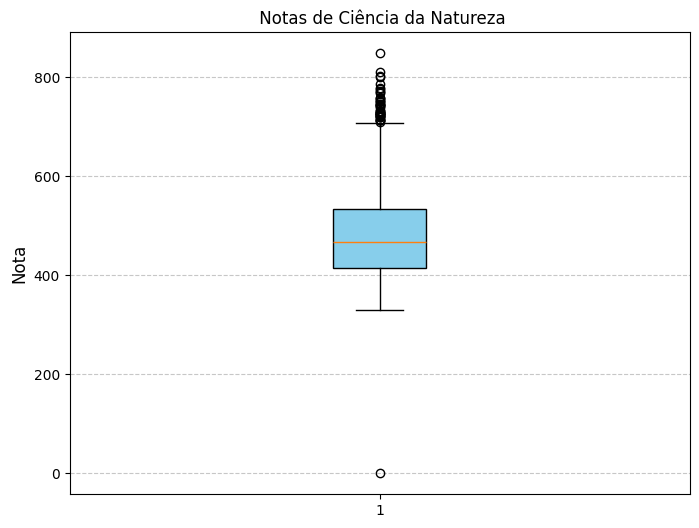

In [14]:
plt.figure(figsize=(8,6))
plt.boxplot(notas_natureza, vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title(" Notas de Ciência da Natureza")
plt.ylabel("Nota", fontsize=12)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

6. Faça o boxplot das notas de CN distribuídas por Sexo;

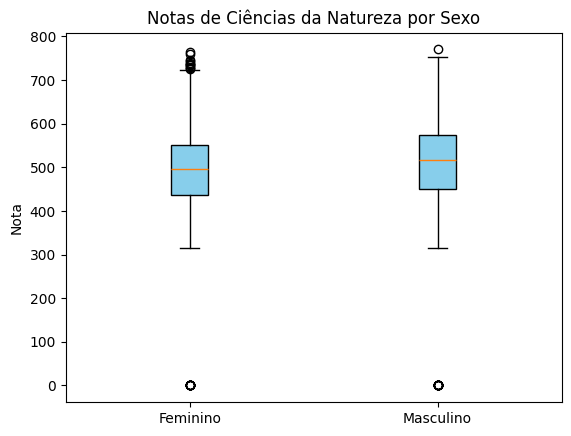

In [38]:
df_notas_sexo = pd.DataFrame({
    "SEXO": df['TP_SEXO'],
    "NATUREZA": df['NU_NOTA_CH']

    })
df_notas_sexo = df_notas_sexo.dropna(subset=['NATUREZA'])
notas_feminino = df_notas_sexo[df_notas_sexo['SEXO'] == 'F']['NATUREZA']
notas_masculino = df_notas_sexo[df_notas_sexo['SEXO']== 'M']['NATUREZA']

# plt.figure(figsize=(8.6))
plt.title('Notas de Ciências da Natureza por Sexo')
plt.boxplot(
    [notas_feminino, notas_masculino],
    tick_labels=['Feminino', 'Masculino'],
    patch_artist=True,
    boxprops=dict(facecolor='skyblue')
)
plt.ylabel('Nota')
plt.show()

7. Calcule a média da nota da redação por Dependência Administrativa;

In [45]:
rotulos_tipo_adm ={
    1: "Federal",
    2: "Estadual",
    3: "Municipal",
    4: "Privada"
}

df_dependencia_adm = pd.DataFrame({
    "DEPENDECIA_ADM": df["TP_DEPENDENCIA_ADM_ESC"].map(rotulos_tipo_adm)
})
df_dependencia_adm.head()

,DEPENDECIA_ADM
0,Federal
1,Federal
2,Estadual
3,Federal
4,Estadual
